## Automaty komórkowe - modelowanie epidemii
Proszę zaimplementować model epidemii jako automat komórkowy https://mathworld.wolfram.com/CellularAutomaton.html 
Przykładowe modele to np. SIR lub SIS https://en.wikipedia.org/wiki/Epidemic_models_on_lattices  

Program powinien generować:

* wizualizację modelu (animacja, film itp)
* wykresy zmian populacji z czasie

Proszę zbadać działanie modelu dla różnych parametrów.

Program i wyniki proszę zaprezentować w postaci notatnika Jupyter i wgrać 2 pliki w fromatach

* ipynb
* html 

Dodatkowe linki:

* Gra w życie https://mathworld.wolfram.com/GameofLife.html 
* John Conway https://blogs.scientificamerican.com/observations/remembering-mathematical-magician-john-conway/ 
* Stephen Wolfram - "Teoria wszystkiego" https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/ 
* Stephen Wofram - A New Kind of Science https://www.wolframscience.com/nks/ 
* Przykład i porównanie implementacji automatu komórkowego w Julii i w Pythonie https://grimmel.github.io/posts/2020/10/blog-post-1/ 
* Animacje w Plots.js https://docs.juliaplots.org/latest/animations/

In [1]:
using Distributions, DelimitedFiles, Random, StatsBase, Plots, ColorSchemes

In [2]:
struct CovidCellularAutomata
    grid::Array
    gridCartIndex::Array
    s::Array
    i::Array
    r::Array
    recoveryCoeff::Float64
    step::Int
end

In [3]:
function selectCells(shape, amount)
    selected = [CartesianIndex(Int(ceil(rand()*shape[1])), Int(ceil(rand()*shape[2]))) for _ in 1:amount]
    return selected
end

selectCells (generic function with 1 method)

In [4]:
function newInfected(cartIdx)
    angle = 360.0*rand()
    x = Int(round(cos(deg2rad(angle)), digits=0)) + cartIdx[2]
    y = Int(round(sin(deg2rad(angle)), digits=0)) + cartIdx[1]
    return (y, x)
end

newInfected (generic function with 1 method)

In [5]:
function spread(ca::CovidCellularAutomata)
    shape = size(ca.grid)
    selected = selectCells(shape, ca.step)
    for cell in selected
        if ca.grid[cell] == 1
            test = rand()
            if test < ca.recoveryCoeff
                ca.grid[cell] = 2
                ca.i[1] -= 1
                ca.r[1] += 1
            else
                newXY = newInfected(cell)
                if newXY[1] >= 1 && newXY[1] <= shape[1] && newXY[2] >= 1 && newXY[2] <= shape[2] && ca.grid[newXY[2], newXY[1]] == 0
                    ca.grid[newXY[2], newXY[1]] = 1
                    ca.s[1] -= 1
                    ca.i[1] += 1
                end
            end
        end
    end
end         

spread (generic function with 1 method)

In [30]:
function simulate(ca::CovidCellularAutomata, iterations, stats_s, stats_i, stats_r)
    for i in 1:iterations
        spread(ca)
        stats_s[i] = ca.s[1]
        stats_i[i] = ca.i[1]
        stats_r[i] = ca.r[1]
    end
end

simulate (generic function with 2 methods)

In [32]:
function plotSimulate(ca::CovidCellularAutomata, i, stats_s, stats_i, stats_r)
    spread(ca)
    if i%10 == 0
        plot(heatmap(ca.grid, c = cgrad([:blue, :red, :green]), clim = (0.0, 2.0)))
    end
    stats_s[i] = ca.s[1]
    stats_i[i] = ca.i[1]
    stats_r[i] = ca.r[1]
end

plotSimulate (generic function with 2 methods)

┌ Info: Saved animation to 
│   fn = C:\Users\bchwa\tmp.gif
└ @ Plots C:\Users\bchwa\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\bchwa\\tmp.gif")
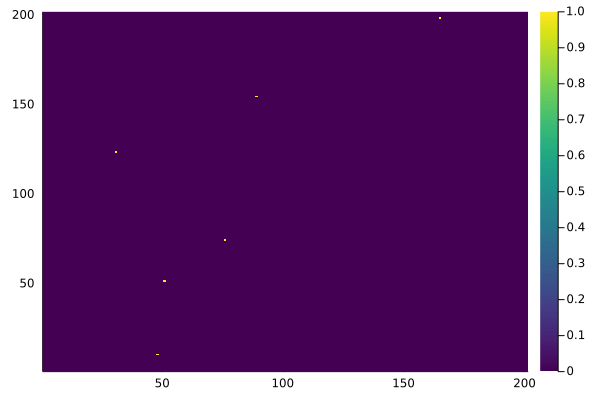

In [39]:
grid = zeros(201, 201)
grid[51, 51] = 1
grid[10, 48] = 1
grid[74, 76] = 1
grid[123, 31] = 1
grid[198, 165] = 1
grid[154, 89] = 1
gridCartIndex = CartesianIndices(grid)
s = [size(grid)[1] * size(grid)[2] - 6]
i = [6]
r = [0]
recoveryCoeff = 0.01
step = 3000
model = CovidCellularAutomata(grid, gridCartIndex, s, i, r, recoveryCoeff, step)

n = 5000
stats_s = zeros(n)
stats_i = zeros(n)
stats_r = zeros(n)

plot(heatmap(model.grid, c = :viridis))

@gif for i in 1:n
#     if (model.sLeft[1] <= 100) 
#         break
#     end
    plotSimulate(model, i, stats)
end every 5

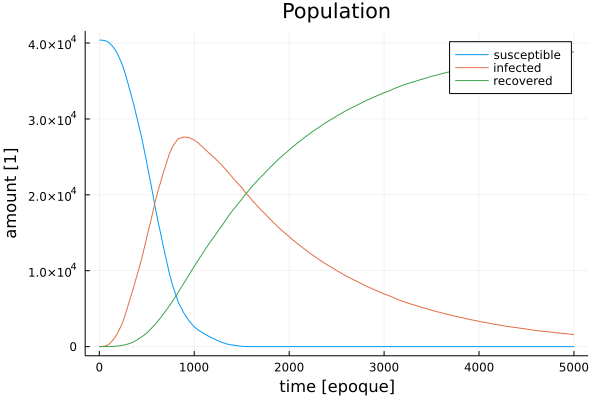

In [40]:
xs = 1:n
plot(xs, stats_s, title="Population", xlab="time [epoque]", ylab="amount [1]", label="susceptible")
plot!(xs, stats_i, label="infected")
plot!(xs, stats_r, label="recovered")

┌ Info: Saved animation to 
│   fn = C:\Users\bchwa\tmp.gif
└ @ Plots C:\Users\bchwa\.julia\packages\Plots\cPJQu\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\bchwa\\tmp.gif")
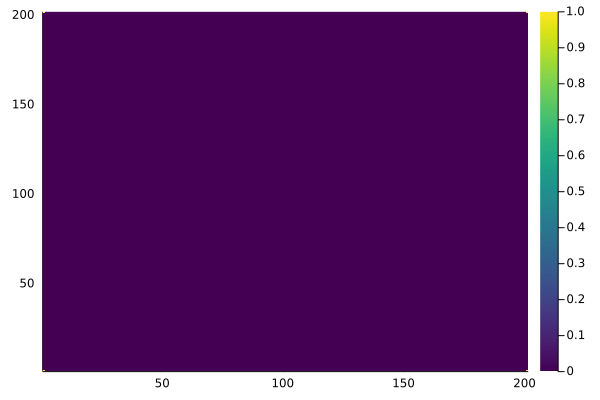

In [43]:
grid = zeros(201, 201)
grid[1, 1] = 1
grid[1, 201] = 1
grid[201, 201] = 1
grid[201, 1] = 1
gridCartIndex = CartesianIndices(grid)
s = [size(grid)[1] * size(grid)[2] - 4]
i = [4]
r = [0]
recoveryCoeff = 0.01
step = 3000
model = CovidCellularAutomata(grid, gridCartIndex, s, i, r, recoveryCoeff, step)

n = 6000
stats_s = zeros(n)
stats_i = zeros(n)
stats_r = zeros(n)

plot(heatmap(model.grid, c = :viridis))

@gif for i in 1:n
#     if (model.sLeft[1] <= 100) 
#         break
#     end
    plotSimulate(model, i, stats)
end every 5

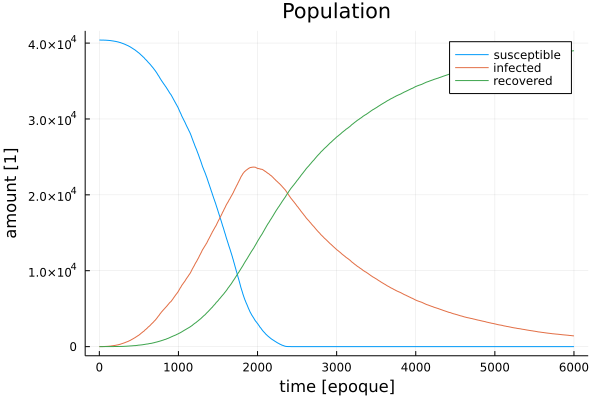

In [44]:
xs = 1:n
plot(xs, stats_s, title="Population", xlab="time [epoque]", ylab="amount [1]", label="susceptible")
plot!(xs, stats_i, label="infected")
plot!(xs, stats_r, label="recovered")